In [1]:
# Python 3.8
# keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D,Reshape, Dense, Dropout, Activation, Flatten
from tensorflow.keras.preprocessing import image
from tensorflow.keras import Sequential
import tensorflow as tf
import keras

# sklearn
from sklearn.svm import SVC

# Tool
import matplotlib.pyplot as plt
import numpy as np

# 1. Data Loading

In [2]:
classes = ['taffy','dongbro']

In [3]:
train_data = []
train_labels = []
for i in range(21):
    data = np.array(tf.keras.utils.load_img('train/taffy/'+ str(i) + '.png')) / 255
    data = tf.image.resize(data, [255, 255])
    data = np.array(data)
    train_data.append(data)
    train_labels.append(0)
for i in range(21):
    data = np.array(tf.keras.utils.load_img('train/dongbro/'+ str(i) + '.png')) / 255
    data = tf.image.resize(data, [255, 255])
    data = np.array(data)
    train_data.append(data)
    train_labels.append(1)
    

is_one_hot = True

train_X = np.stack(train_data, axis=0)
train_labels = np.stack(train_labels, axis=0)
if is_one_hot:
    train_y = np.zeros((train_labels.shape[0],len(classes)))
    for i in range(train_y.shape[0]):
        train_y[i][train_labels[i]] = train_y[i][train_labels[i]] + 1
else:
    train_y = train_labels

# 2. Data previewing

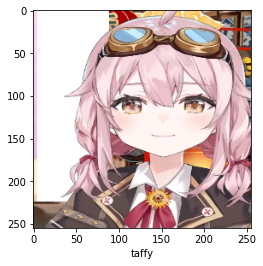

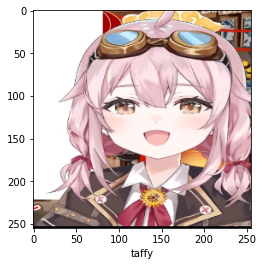

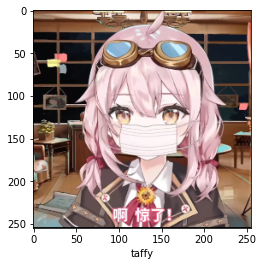

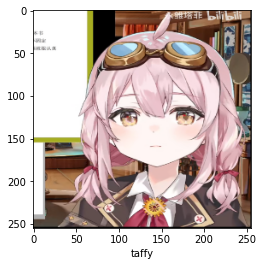

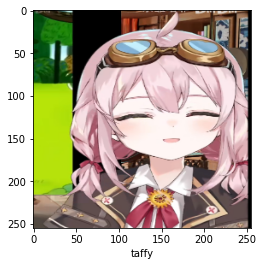

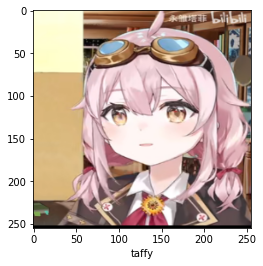

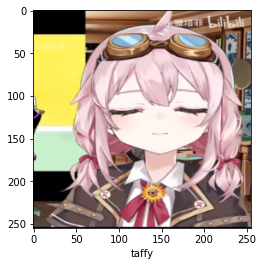

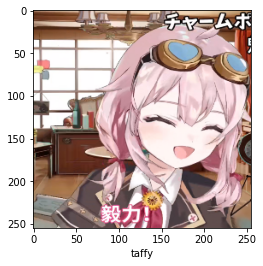

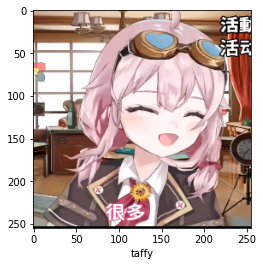

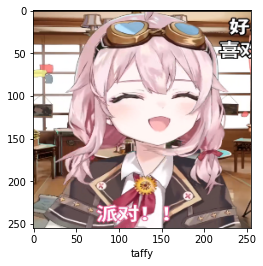

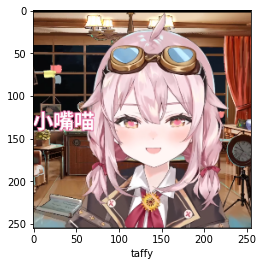

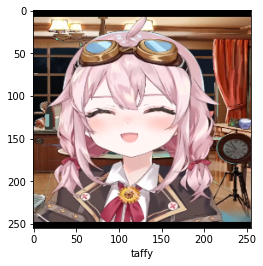

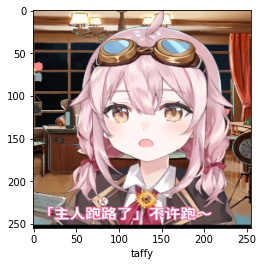

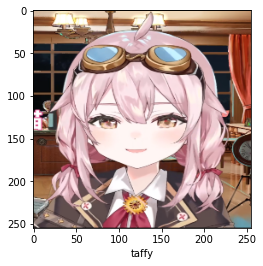

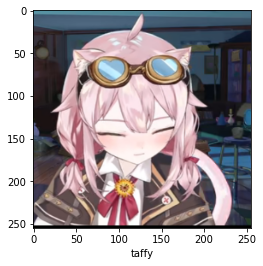

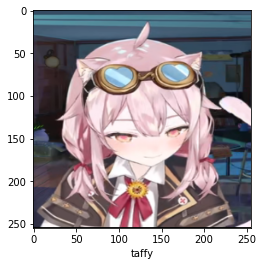

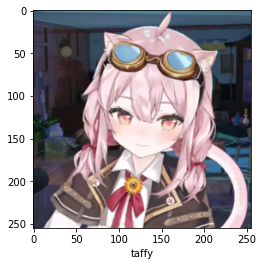

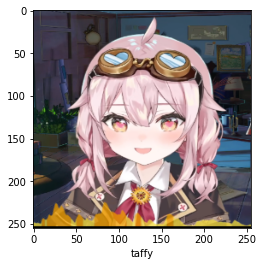

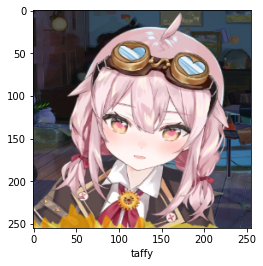

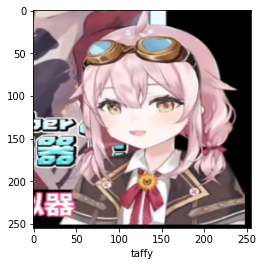

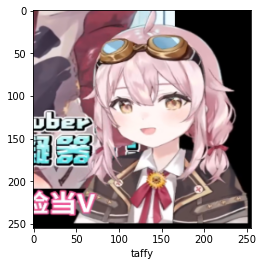

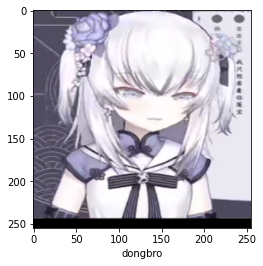

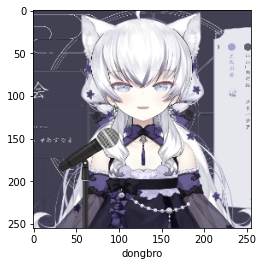

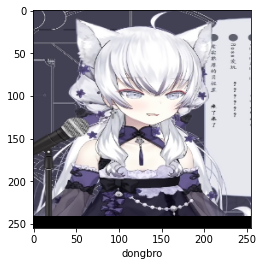

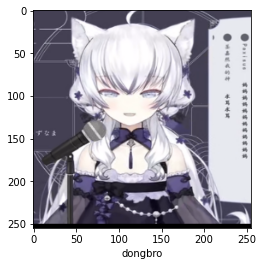

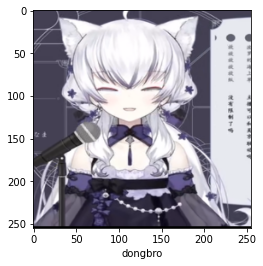

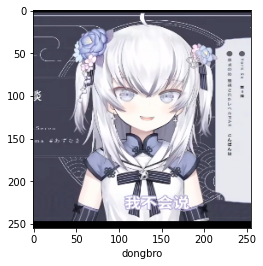

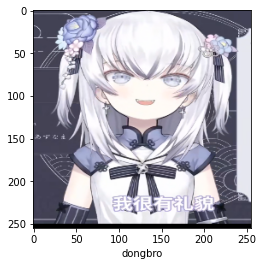

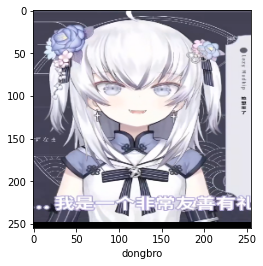

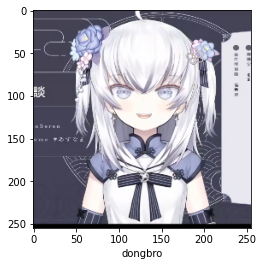

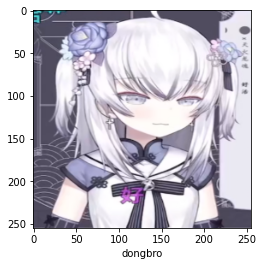

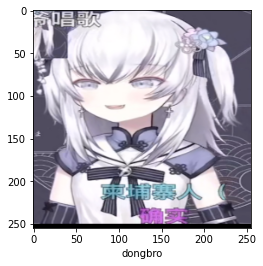

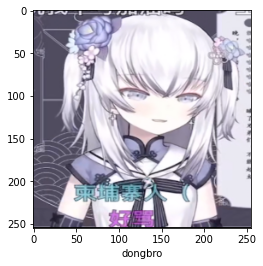

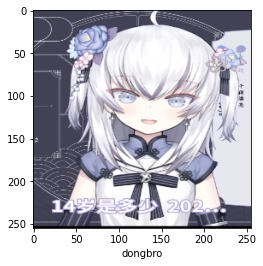

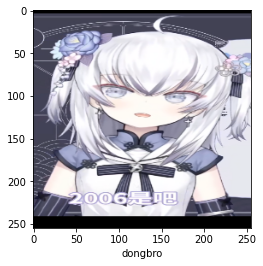

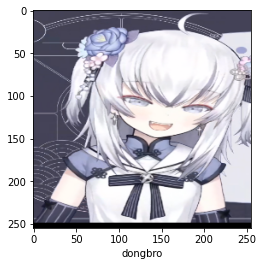

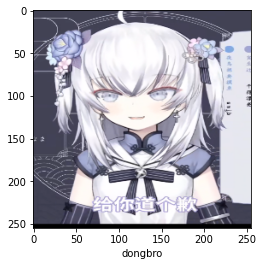

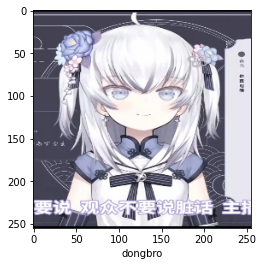

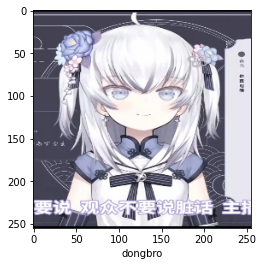

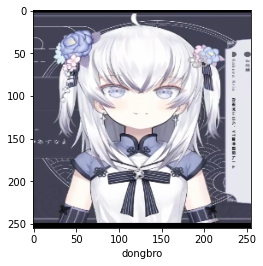

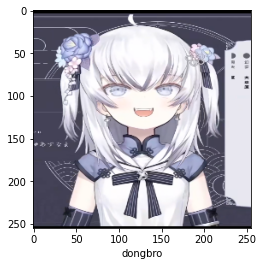

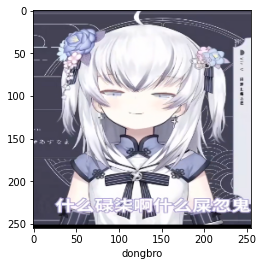

In [4]:
for i in range(train_X.shape[0]):
    plt.imshow(train_X[i])
    plt.xlabel(classes[train_labels[i]])
    plt.show()

# 3. Model compile and training

In [5]:
# model
model = Sequential()
#
model.add(Conv2D(16, (3, 3), name='conv1', padding='same', activation='relu', kernel_initializer='glorot_uniform', input_shape=(255,255,3)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same', data_format=None))
#
model.add(Conv2D(32, (3, 3), name='conv2', padding='same', activation='relu', kernel_initializer='glorot_uniform', input_shape=(255,255,3)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same', data_format=None))
#
model.add(Conv2D(64, (3, 3), name='conv3', padding='same', activation='relu', kernel_initializer='glorot_uniform', input_shape=(255,255,3)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same', data_format=None))
#
model.add(Flatten())
#
model.add(Dense(512, name='dense1', kernel_initializer='he_normal', activation='relu'))
# only binary
model.add(Dense(2, name='dense2', kernel_initializer='he_normal', activation='softmax'))

In [6]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [7]:
history = model.fit(
    train_X, 
    train_y,
    epochs = 50,
    verbose= 2,
    validation_split=0.2
)

Epoch 1/50
2/2 - 2s - loss: 0.6649 - accuracy: 0.7273 - val_loss: 47.5931 - val_accuracy: 0.0000e+00 - 2s/epoch - 922ms/step
Epoch 2/50
2/2 - 1s - loss: 16.6895 - accuracy: 0.6364 - val_loss: 0.2792 - val_accuracy: 1.0000 - 986ms/epoch - 493ms/step
Epoch 3/50
2/2 - 1s - loss: 0.2134 - accuracy: 0.9697 - val_loss: 0.0040 - val_accuracy: 1.0000 - 985ms/epoch - 493ms/step
Epoch 4/50
2/2 - 1s - loss: 0.3488 - accuracy: 0.8182 - val_loss: 6.3175 - val_accuracy: 0.0000e+00 - 1s/epoch - 508ms/step
Epoch 5/50
2/2 - 1s - loss: 1.9398 - accuracy: 0.6364 - val_loss: 1.9671 - val_accuracy: 0.0000e+00 - 908ms/epoch - 454ms/step
Epoch 6/50
2/2 - 1s - loss: 0.4438 - accuracy: 0.6667 - val_loss: 0.0355 - val_accuracy: 1.0000 - 916ms/epoch - 458ms/step
Epoch 7/50
2/2 - 1s - loss: 0.0315 - accuracy: 1.0000 - val_loss: 0.0076 - val_accuracy: 1.0000 - 908ms/epoch - 454ms/step
Epoch 8/50
2/2 - 1s - loss: 0.3112 - accuracy: 0.8485 - val_loss: 0.0147 - val_accuracy: 1.0000 - 901ms/epoch - 451ms/step
Epoch 9/

# 4. Loading test data set

In [8]:
test_data = []
test_labels = []
for i in range(5):
    data = np.array(tf.keras.utils.load_img('test/taffy/'+ str(i) + '.png')) / 255
    data = tf.image.resize(data, [255, 255])
    data = np.array(data)
    test_data.append(data)
    test_labels.append(0)
for i in range(5):
    data = np.array(tf.keras.utils.load_img('test/dongbro/'+ str(i) + '.png')) / 255
    data = tf.image.resize(data, [255, 255])
    data = np.array(data)
    test_data.append(data)
    test_labels.append(1)
    
test_X = np.stack(test_data, axis=0)
test_labels = np.stack(test_labels, axis=0)
if is_one_hot:
    test_y = np.zeros((test_labels.shape[0],len(classes)))
    for i in range(test_y.shape[0]):
        test_y[i][test_labels[i]] = test_y[i][test_labels[i]] + 1
else:
    test_y = test_labels

In [9]:
print(test_X.shape)
print(test_y.shape)

(10, 255, 255, 3)
(10, 2)


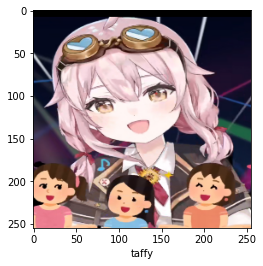

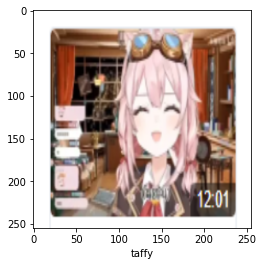

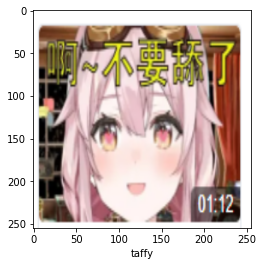

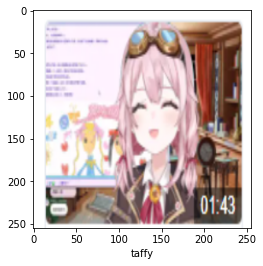

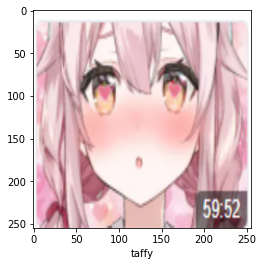

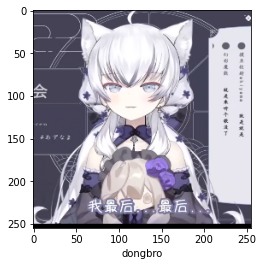

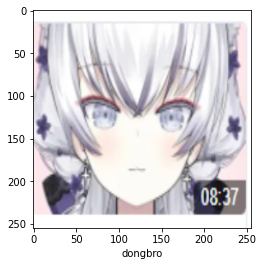

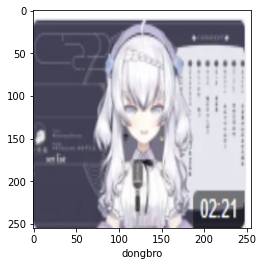

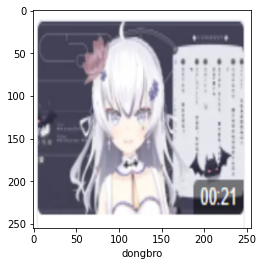

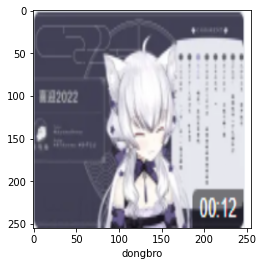

IndexError: index 10 is out of bounds for axis 0 with size 10

In [10]:
for i in range(15):
    plt.imshow(test_X[i])
    plt.xlabel(classes[test_labels[i]])
    plt.show()

# 5. Model performance

In [11]:
score = model.evaluate(test_X, test_y, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

1/1 [==============================] - 0s 71ms/step - loss: 0.1100 - accuracy: 0.9000
Test loss: 0.11001765727996826
Test accuracy: 0.8999999761581421


In [12]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues, labels=[], scale=(1,1)):
    plt.figure(figsize=scale)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [13]:
# confusion matrix
conf = np.zeros([len(classes),len(classes)])
confnorm1 = np.zeros([len(classes),len(classes)])

test_pred_labels = model.predict(test_X, batch_size=2)

for i in range(0,test_X.shape[0]):
    j = list(test_y[i,:]).index(1)
    k = int(np.argmax(test_pred_labels[i,:]))
    conf[j,k] = conf[j,k] + 1
    
for i in range(0,len(classes)):
    confnorm1[i,:] = conf[i,:] / np.sum(conf[i,:])

print('Confusion matrix [number]:')
print(conf)

print('Accuracy for each class:')
for i in range(len(classes)):
    sum = 0
    for j in range(len(classes)):
        sum += conf[i][j]
    print('accuracy of class[%s] :%s' % (classes[i], confnorm1[i,i]))

Confusion matrix [number]:
[[4. 1.]
 [0. 5.]]
Accuracy for each class:
accuracy of class[taffy] :0.8
accuracy of class[dongbro] :1.0


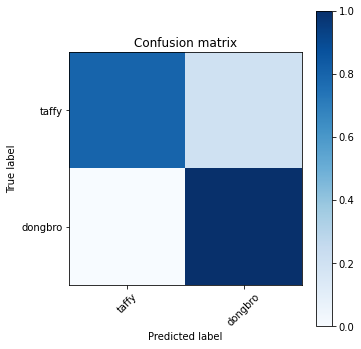

In [14]:
plot_confusion_matrix(confnorm1, labels=classes, scale=(5,5))

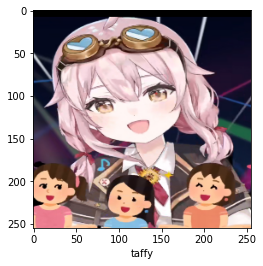

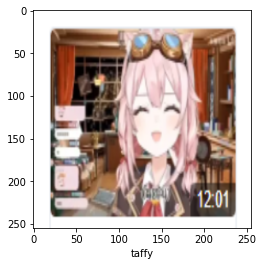

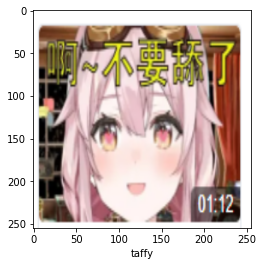

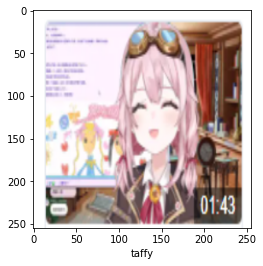

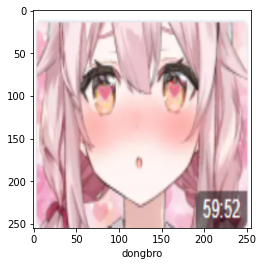

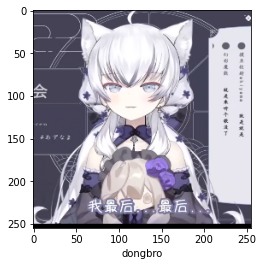

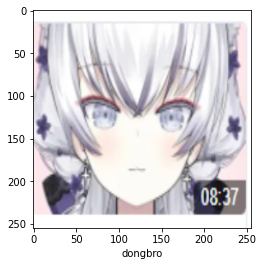

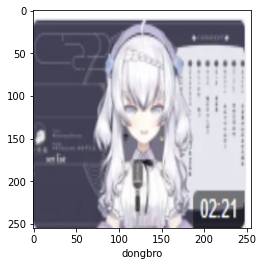

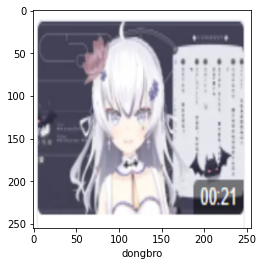

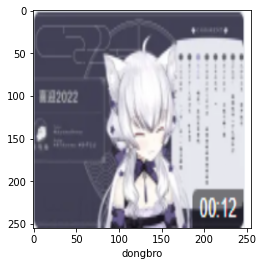

In [16]:
for i in range(10):
    plt.imshow(test_X[i])
    plt.xlabel(classes[np.argmax(test_pred_labels[i])])
    plt.show()